In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

UPLOAD FILE

In [ ]:
uploaded = files.upload()


READ FILE

In [ ]:
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
iris.head()


In [ ]:
iris['Species'].value_counts()


TRỰC QUAN HÓA DỮ LIỆU
- theo chiều dài và chiều rộng của lá đài
- theo chiều dài và chiều rộng của cánh hoa
- chiều dài cánh hoa và lá đài
- chiều rộng cánh hoa và lá đài

In [ ]:
#dài rộng lá đài
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'Petal.Length','Petal.Width').add_legend()
#dài rộng cánh hoa
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'Sepal.Length','Sepal.Width').add_legend()
#dài cánh hoa, lá đài
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'Sepal.Length','Petal.Length').add_legend()
#rộng cánh hoa, lá đài
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'Petal.Width','Sepal.Width').add_legend()

**CHIA DỮ LIỆU ( 80% TRAIN, 20% TEST )**

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(iris,test_size=0.2,random_state=3)


dữ liệu training

In [ ]:
train['Species'].value_counts()

In [ ]:
train.head()

testing dataset

In [ ]:
test['Species'].value_counts()

NameError: ignored

In [ ]:
test.head()

Thực hiện KNN dự đoán cho testing datset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
neigh=KNC(n_neighbors=1)
X_train = train.iloc[:,:4]
y_train = train.iloc[:,4]
X_test = test.iloc[:,:4]
y_test = test.iloc[:,4]
# train
neigh.fit(X_train, y_train)
# predict
test_predict=neigh.predict(X_test)


In [ ]:
test_predict

In [ ]:
pd.crosstab(test_predict, y_test)

Độ chính xác 

In [ ]:
from sklearn import metrics
metrics.accuracy_score(test_predict, y_test)

DỰ LIỆU TEST BỊ DỰ ĐOÁN SAI

In [ ]:
test_false = []
for i in range(30):
  if test.iloc[i].Species != test_predict[i] :
    test_false.append(i)

test_false


In [ ]:
test.iloc[test_false]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
72,6.3,2.5,4.9,1.5,versicolor
134,6.1,2.6,5.6,1.4,virginica


In [ ]:
test_predict[test_false]

array(['virginica', 'versicolor'], dtype=object)

ĐỘ CHÍNH XÁC THEO K

In [ ]:
k_range = range(1,30)
scores = []
for k in k_range:
    knn = KNC(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    

Text(0, 0.5, 'độ chính xác')

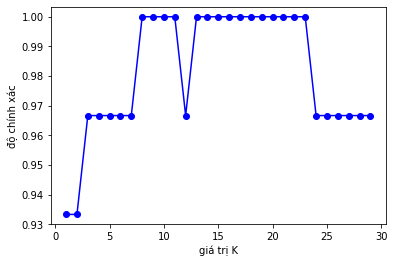

In [ ]:
plt.plot(k_range, scores,'bo-')
plt.xlabel('giá trị K')
plt.ylabel('độ chính xác')


DỰ ĐOÁN CHO 1 DỮ LIÊU

In [ ]:
uploaded = files.upload()

Saving testiris.csv to testiris (4).csv


In [ ]:
iris_test = pd.read_csv(io.BytesIO(uploaded['testiris.csv']))
iris_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,6.1,4.5,2.4,0.5


In [ ]:
X_iris = iris.iloc[:,:4]
y_iris = iris.iloc[:,4]

In [ ]:
KNN=KNC(n_neighbors=9)
KNN.fit(X_iris, y_iris)
# predict
test_predict = KNN.predict(iris_test)


In [ ]:
test_predict

array(['versicolor'], dtype=object)